In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

## Exercici 1

## Descarga del fichero, exploración  y limpieza de los datos

### Descarga del fichero

In [414]:
lloguer=pd.read_csv('preu lloguer per trimestre i barri.csv')

### Exploración de los datos

In [415]:
lloguer.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [416]:
lloguer.shape

(584, 8)

In [417]:
lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [418]:
lloguer.nunique()

Any                 1
Trimestre           4
Codi_Districte     10
Nom_Districte      10
Codi_Barri         73
Nom_Barri          73
Lloguer_mitja       2
Preu              331
dtype: int64

In [419]:
lloguer['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

#### Descripción del Dataset
Se trata de una base de datos que recoge información sobre medias de precios de alquiler por distrito y barrio de la ciudad de Barcelona.

#### Variables
-Any : El año 2021  
-Trimestre : Los 4 trimestres del 2021  
-Codi_Districte : Los 10 distritos de Barcelona de 1 a 10  
-Nom_Districte : Los 10 distritos  
-Codi_Barri : Los 73 barrios de Barcelona de 1 a 73  
-Nom_Barri : Los 73 barrios de Barcelona  
-Lloguer_mitja:  
Esta variable alberga 2 variables diferentes relativas al precio de alquiler por barrio  
    - Lloguer mitjà mensual (Euros/mes): el precio medio de alquiler mensual  
    - Lloguer mitjà per superfície (Euros/m2 mes) : el precio medio de alquiler mensual por m2  
-Preu : El precio en €

### Limpieza de datos  

Tal y como podemos observar, el tipo de la variable Preu es objeto, necesitamos que sea de tipo numérico, así que intentamos convertir la columna al tipo float64, pero nos devuelve el siguiente mensaje de error:

lloguer['Preu']=lloguer['Preu'].astype('float64')  
ValueError: could not convert string to float: '--'  

Analizamos cuales son los datos faltantes:



#### Eliminamos datos faltantes : lloguer_new

In [420]:
lloguer[lloguer['Preu']=='--']['Nom_Barri'].value_counts()

la Marina del Prat Vermell    8
la Clota                      8
Can Peguera                   8
Torre Baró                    8
Vallbona                      8
Baró de Viver                 4
Name: Nom_Barri, dtype: int64

Faltan todos los datos de 5 barrios y la mitad de los datos de 1 barrio.  
Decidimos eliminar los datos de estos barrios con tal de que no afecten a la consolidación de datos por otras variables.

In [421]:
lloguer_new=lloguer[lloguer['Nom_Barri'].isin([
'la Marina del Prat Vermell','la Clota','Can Peguera','Torre Baró','Vallbona','Baró de Viver']
)==False].reset_index(drop=True)

#### Convertimos variable 'Preu' a dato numérico

In [422]:
lloguer_new['Preu']=lloguer_new['Preu'].astype('float64')

lloguer_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             536 non-null    int64  
 1   Trimestre       536 non-null    int64  
 2   Codi_Districte  536 non-null    int64  
 3   Nom_Districte   536 non-null    object 
 4   Codi_Barri      536 non-null    int64  
 5   Nom_Barri       536 non-null    object 
 6   Lloguer_mitja   536 non-null    object 
 7   Preu            536 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 33.6+ KB


#### Creamos un nuevo dataframe con variables nuevas : lloguer_bis

La variable Lloguer_mitja contiene 2 subvariables, con tal de poder realizar cálculos que implican las 2 subvariables, es necesario crear 2 variables nuevas con su precios respectivos y plasmarlas en un nuevo dataframe de la siguiente manera:  
- Lloguer mitjà mensual (Euros/mes)/Preu: Preu_mitja(€/mes)
- Lloguer mitjà per superfície (Euros/m2 mes)/Preu : Preu_m2(€/mes)



In [423]:
df=lloguer_new.sort_values(
    by=['Lloguer_mitja','Trimestre','Codi_Districte','Codi_Barri',],ignore_index=True)

                                

In [424]:
df1=df[df['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)'].rename(
    columns={'Preu':'Preu_mitja'}).drop('Lloguer_mitja',axis=1)
df1.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja
0,2021,1,1,Ciutat Vella,1,el Raval,759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4
4,2021,1,2,Eixample,5,el Fort Pienc,918.0


In [425]:
df2=df[df['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)'].rename(
    columns={'Preu':'Preu_m2'}).reindex(
    columns=['Preu_m2']).reset_index(drop=True)
df2.head()

,Preu_m2
0,12.8
1,12.3
2,15.5
3,13.3
4,12.9


In [426]:
lloguer_bis=pd.merge(df1, df2, left_index=True, right_index=True)
lloguer_bis.head()


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja,Preu_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9


In [464]:
lloguer_bis['Superficie_mitja']=lloguer_bis['Preu_mitja']/lloguer_bis['Preu_m2']
lloguer_bis.sort_values(by=['Preu_mitja'],ascending=False)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_mitja,Preu_m2,Superficie_mitja
153,2021,3,4,Les Corts,21,Pedralbes,1816.5,15.8,114.968354
86,2021,2,4,Les Corts,21,Pedralbes,1680.3,15.5,108.406452
220,2021,4,4,Les Corts,21,Pedralbes,1679.3,14.8,113.466216
19,2021,1,4,Les Corts,21,Pedralbes,1598.2,14.0,114.157143
223,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,1597.4,16.4,97.402439
...,...,...,...,...,...,...,...,...,...
250,2021,4,8,Nou Barris,53,la Trinitat Nova,557.0,11.5,48.434783
184,2021,3,8,Nou Barris,55,Ciutat Meridiana,547.7,9.3,58.892473
251,2021,4,8,Nou Barris,55,Ciutat Meridiana,546.8,9.2,59.434783
50,2021,1,8,Nou Barris,55,Ciutat Meridiana,520.2,9.0,57.800000


## Analisis estadístico

In [448]:
lloguer_bis[['Preu_mitja','Preu_m2','Superficie_mitja']].describe()

,Preu_mitja,Preu_m2,Superficie_mitja
count,268.000000,268.000000,268.000000
mean,874.127239,12.756343,68.015259
std,219.930325,1.653256,10.751166
min,488.100000,8.100000,48.434783
25%,745.100000,11.700000,61.772528
50%,817.300000,12.800000,65.912788
75%,938.025000,13.600000,71.120740
max,1816.500000,18.000000,114.968354


In [ ]:
lloguer_bis.groupby(['Nom_Barri']).agg({'Preu_mitja': ['mean'],'Preu_m2':['mean']})
lloguer_bis.groupby(['Nom_Barri']).mean().sort_values(by='Preu_mitja')

In [465]:
lloguer_bis.groupby(['Nom_Districte']).agg({'Preu_mitja': ['mean'],'Preu_m2':['mean'],'Superficie_mitja':['mean']})

,Preu_mitja,Preu_m2,Superficie_mitja
,mean,mean,mean
Nom_Districte,,,
Ciutat Vella,858.925000,13.775000,63.032177
Eixample,1000.545833,13.300000,75.253472
Gràcia,877.265000,13.380000,65.576825
Horta-Guinardó,765.007500,11.987500,63.894109
Les Corts,1214.066667,14.008333,85.707679
Nou Barris,664.292500,10.922500,61.351853
Sant Andreu,736.954167,11.420833,64.398718
Sant Martí,916.450000,13.440000,67.861083


Podemos destacar lo siguiente:  

- El precio medio de alquiler por barrio y trimestre en Barcelona en 2021 fue de 875€, con un precio medio por m2 de 12,75€. La superficie media de alquiler por barrio fue de 68m2.
- Los distritos de Sarrià-Sant Gervasí y les Corts coincidieron en tener los precios de alquiler, precios/m2 y superficies más altos de la ciudad.
- Al contrario, los distritos de Nou Barris y Sant Andreu coincidieron en tener los precios de alquiler, precios/m2 y superficies más bajos de la ciudad.
- Se detecta una cierta correlación entre el precio/m2 y la superficie, que intentaremos analizar más adelante.

In [466]:
lloguer_bis.groupby(['Trimestre']).agg({'Preu_mitja': ['mean'],'Preu_m2':['mean'],'Superficie_mitja':['mean']})

,Preu_mitja,Preu_m2,Superficie_mitja
,mean,mean,mean
Trimestre,,,
1,869.304478,12.691045,67.950955
2,857.946269,12.652239,67.402284
3,880.794030,12.771642,68.425307
4,888.464179,12.910448,68.282491


- El análisis por trimestres indica que los precios de alquileres se han mantenido estables a lo largo del año.  
- Hay un incremento total de poco más del 2%.  
- Es importante recalcar que en el 2021 regía la ley de control de alquileres de la Generalitat que prohibía incrementar los precios en los nuevos contratos, combinado con la inflación prácticamente nula, es coherente que se observe poca evolución anual.  

## Analisis gráfico

### Una variable categórica : Districte

<function matplotlib.pyplot.show(close=None, block=None)>

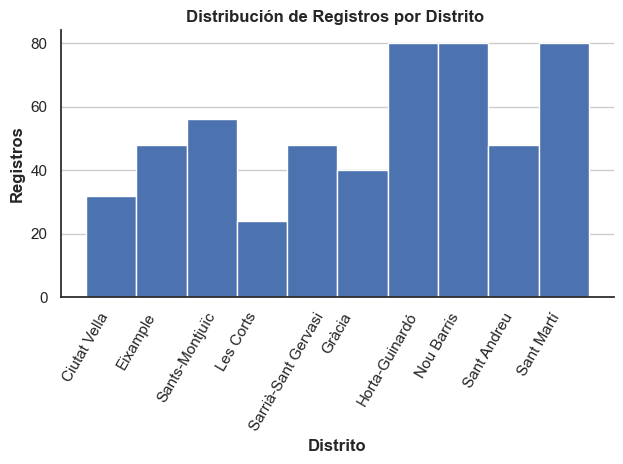

In [589]:
plt.rcParams['figure.autolayout']=True

customs_params={'axes.spines.right':False,'axes.spines.top':False,}

sns.set_theme(style='white',rc=customs_params)

bins=range(11)
plt.hist(lloguer_new['Nom_Districte'],bins=bins)

plt.xticks(rotation=60)
plt.xlabel('Distrito',fontweight='bold')
plt.ylabel('Registros',fontweight='bold')
plt.title('Distribución de Registros por Distrito ',fontweight='bold')
plt.grid(axis='y')

plt.show


Este gráfica representa la distribución de registros de la variable Nom_Distrito, o dicho de otra manera, la cantidad de observaciones por distrito.

Podemos constatar que la cantidad de registros es proporcional a la cantidad de barrios de cada distrito. El distrito de Ciutat Vella tiene 4 barrios, por 4 trimestres, por 2 tipos de registros(precio_medio y precio_m2), son 32 registros. El distrito de Sant Marti, con 10 barrios tiene 80 registros.

### Una variable numérica : Preu



<function matplotlib.pyplot.show(close=None, block=None)>

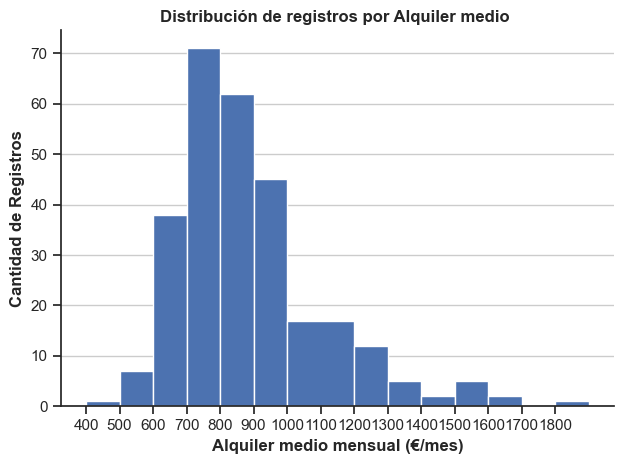

In [593]:
plt.rcParams['figure.autolayout']=True
customs_params={'axes.spines.right':False,'axes.spines.top':False,}
sns.set_theme(style='ticks',rc=customs_params)

plt.hist(lloguer_new[lloguer_new['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)']['Preu'],bins=[
    400,500,600,700,800,900,1000,1200,1300,1400,1500,1600,1700,1800,1900])
plt.xticks(np.arange(400,1900,100))
plt.xlabel('Alquiler medio mensual (€/mes)',fontweight='bold')
plt.ylabel('Cantidad de Registros',fontweight='bold')
plt.title('Distribución de registros por Alquiler medio ',fontweight='bold')
plt.grid(axis='y')
plt.show

Este gráfica representa la distribución de registros de la variable Preu(Lloguer mitjà mensual (Euros/mes)).

El alquiler medio más frecuente está entre 700€ y 800€

<function matplotlib.pyplot.show(close=None, block=None)>

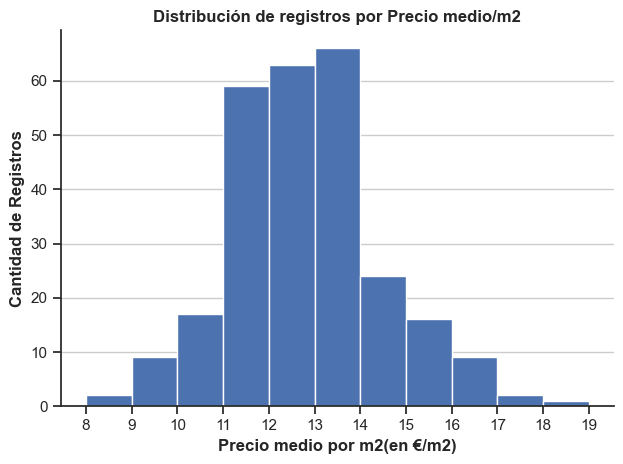

In [595]:
plt.rcParams['figure.autolayout']=True
customs_params={'axes.spines.right':False,'axes.spines.top':False,}
sns.set_theme(style='ticks',rc=customs_params)

plt.hist(lloguer_new[lloguer_new['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)']['Preu'],bins=[
    8,9,10,11,12,13,14,15,16,17,18,19])
plt.xticks(np.arange(8,20,1))
plt.xlabel('Precio medio por m2(en €/m2)',fontweight='bold')
plt.ylabel('Cantidad de Registros',fontweight='bold')
plt.title('Distribución de registros por Precio medio/m2',fontweight='bold')
plt.grid(axis='y')
plt.show

Este gráfica representa la distribución de registros de la variable Preu(Lloguer mitjà per superfície (Euros/m2 mes)).

El precio medio más frecuente está entre 13€/m2 y 14€/m2


### Una variable numérica i una categórica (Districte i Preu)

<function matplotlib.pyplot.show(close=None, block=None)>

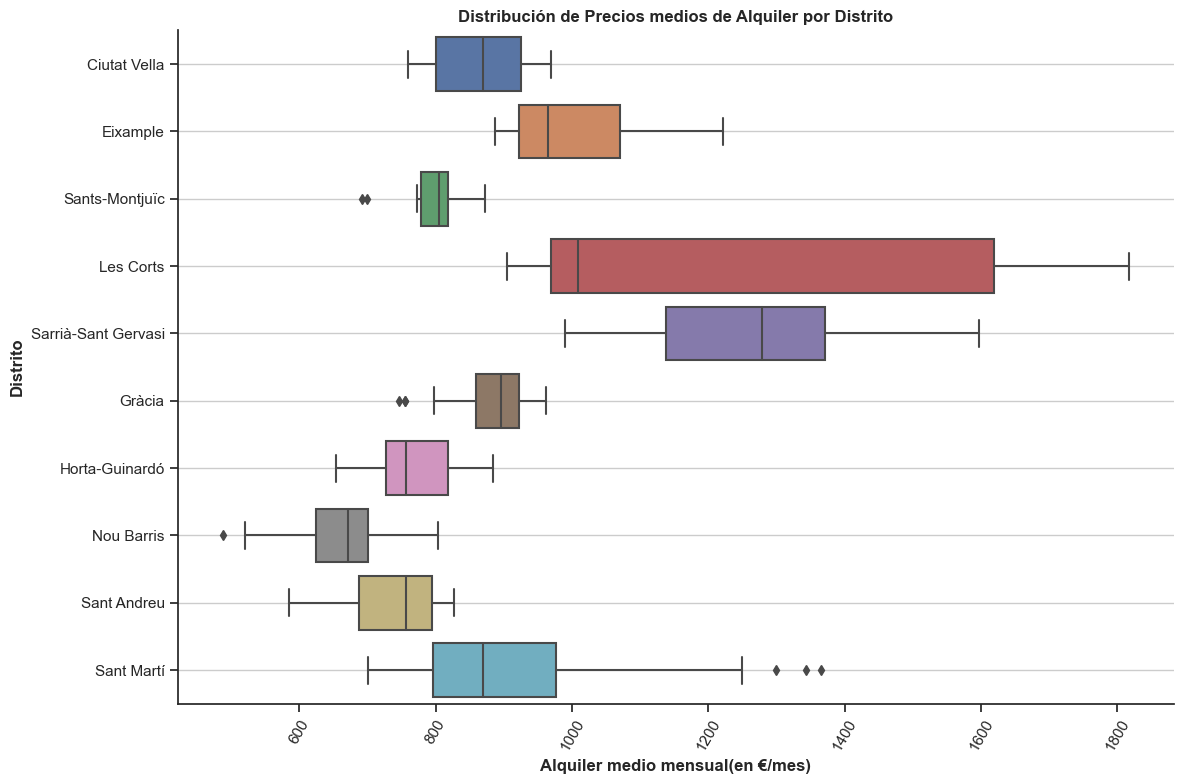

In [626]:
plt.rcParams['figure.autolayout']=True
fig,axes=plt.subplots(figsize=(12,8))
sns.boxplot(data=lloguer_bis,y='Nom_Districte',x='Preu_mitja')
plt.xticks(rotation=60)
plt.xlabel('Alquiler medio mensual(en €/mes)',fontweight='bold')
plt.ylabel('Distrito',fontweight='bold')
plt.title('Distribución de Precios medios de Alquiler por Distrito',fontweight='bold')
plt.grid(axis='y')
plt.show

Esta gráfica representa la distribución de precios medios de alquiler por distrito. 

Se confirma que Nou Barris y San Andreu tienen los precios de alquiler más bajos, Les Corts y San Gervasí los más altos.

Es interesante observar que la dispersión de datos es muy marcada en el caso de Les Corts y Sant Gervasí y muy baja en el caso de Sants y Gràcia. 

<function matplotlib.pyplot.show(close=None, block=None)>

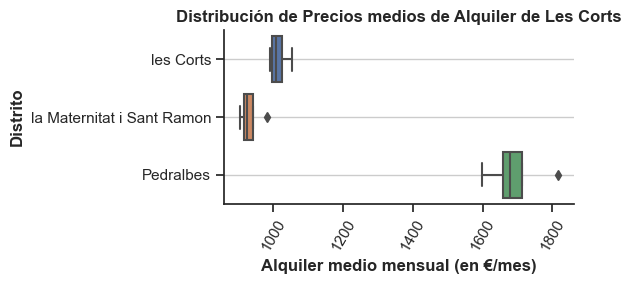

In [628]:
plt.rcParams['figure.autolayout']=True
fig,axes=plt.subplots(figsize=(6,3))
sns.boxplot(data=lloguer_bis[lloguer_bis['Nom_Districte']=='Les Corts'],y='Nom_Barri',x='Preu_mitja')
plt.xticks(rotation=60)
plt.xlabel('Alquiler medio mensual (en €/mes)',fontweight='bold')
plt.ylabel('Distrito',fontweight='bold')
plt.title('Distribución de Precios medios de Alquiler de Les Corts',fontweight='bold')
plt.grid(axis='y')
plt.show

Esta gráfica nos enseña que la dispersión de datos en el distrito de les Corts se debe a las características del barrio de Pedralbes cuyos precios duplican la media. En este sentido, les Corts es un barrio muy poco homogéneo.


### Dos variables numéricas (Trimestre i Preu)

<function matplotlib.pyplot.show(close=None, block=None)>

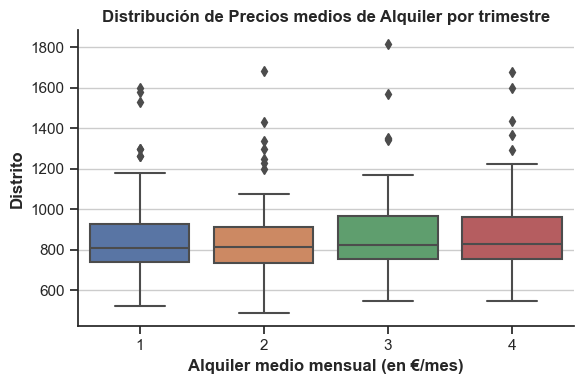

In [642]:
plt.rcParams['figure.autolayout']=True
fig,axes=plt.subplots(figsize=(6,4))
sns.boxplot(data=lloguer_bis,x='Trimestre',y='Preu_mitja')
plt.xticks(rotation='horizontal')
plt.xlabel('Alquiler medio mensual (en €/mes)',fontweight='bold')
plt.ylabel('Distrito',fontweight='bold')
plt.title('Distribución de Precios medios de Alquiler por trimestre',fontweight='bold')
plt.grid(axis='y')
plt.show

Esta gráfica nos reconfirma que el comportamiento entre un trimestre y otro es muy similar.


### Tres variables numéricas (Distrito,Trimestre i Preu)

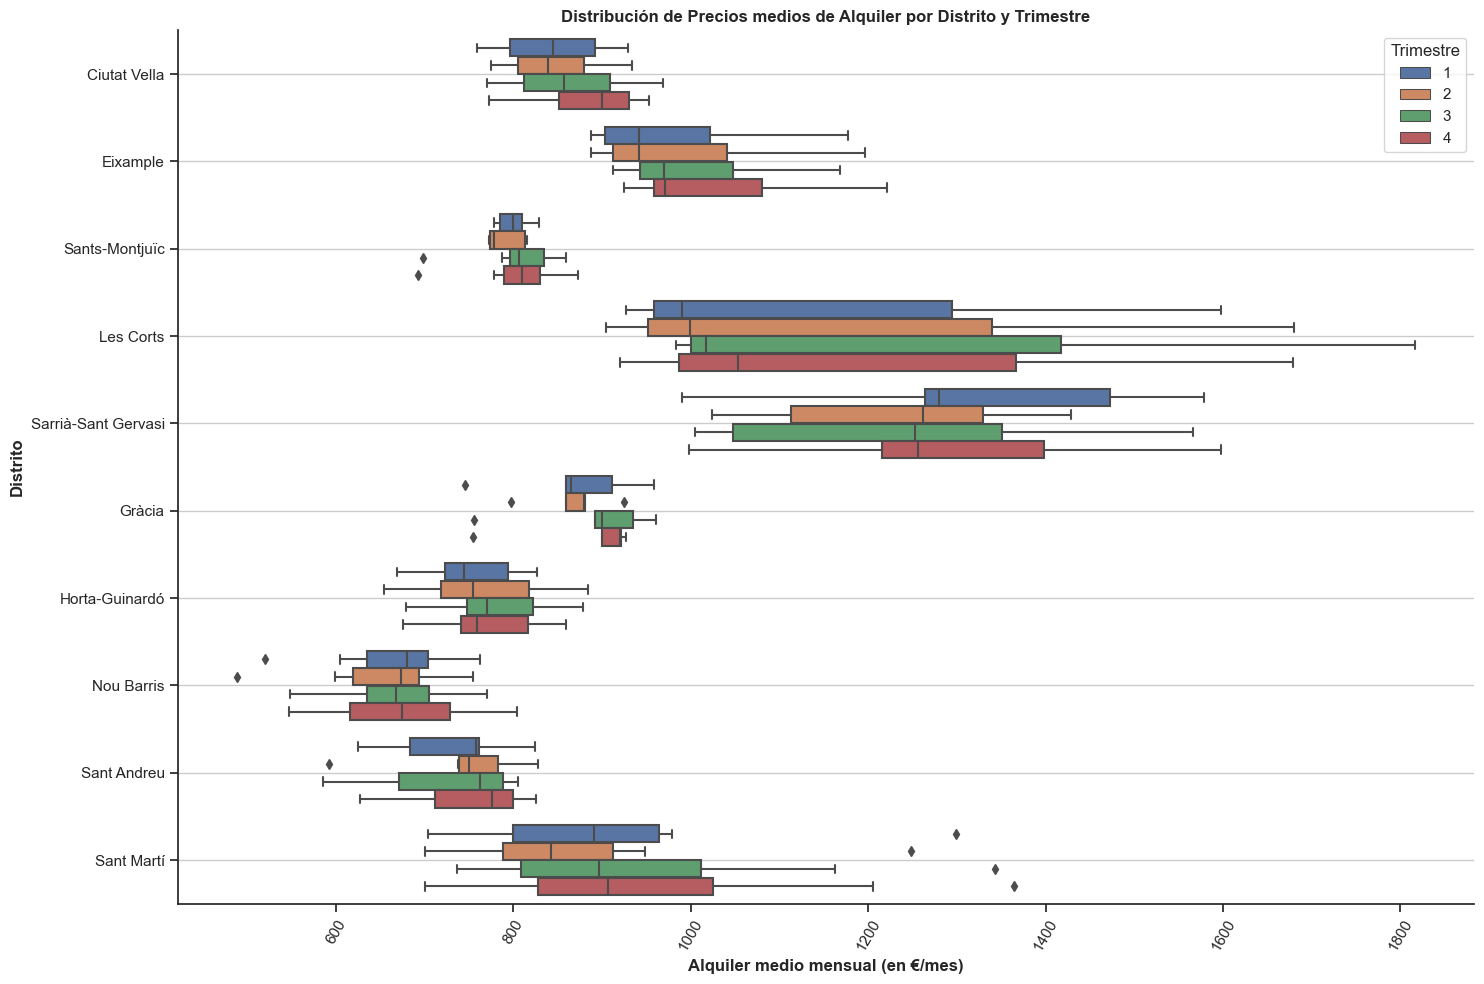

In [666]:

fig,axes=plt.subplots(figsize=(15,10),sharey=True)
sns.boxplot(data=lloguer_bis,x='Preu_mitja',y='Nom_Districte',hue='Trimestre')
plt.xticks(rotation=60)
plt.xlabel('Alquiler medio mensual (en €/mes)',fontweight='bold')
plt.ylabel('Distrito',fontweight='bold')
plt.title('Distribución de Precios medios de Alquiler por Distrito y Trimestre',fontweight='bold')
plt.grid(axis='y')

plt.show


Esta gráfica nos reconfirma la estabilidad de los precios por trimestre.



## Exercici2 / Exercici 3

En el ejercicio 1 detectamos en el análisis estadístico una posible correlación entre el precio/m2 y la superficie. Creamos un gráfico que nos permita visualizar el comportamiento de estas 2 variables.

Guardamos este gráfico como imagen.

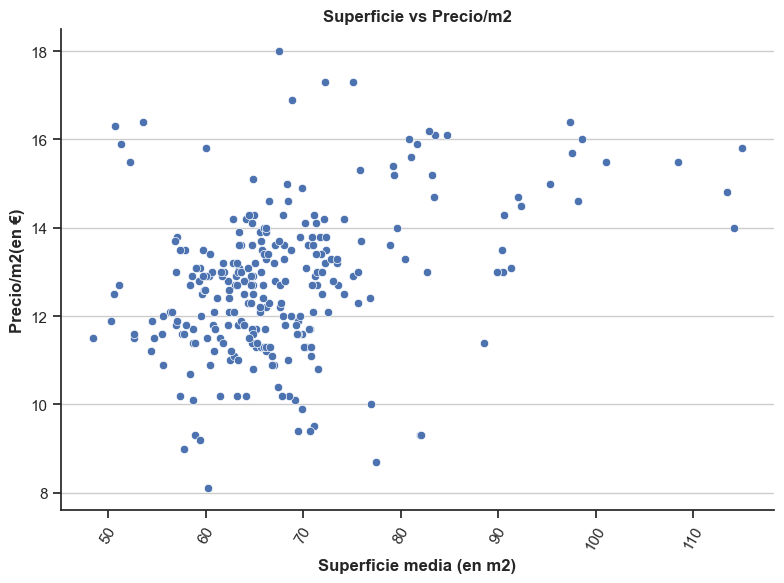

In [665]:
plt.rcParams['figure.autolayout']=True
fig,axes=plt.subplots(figsize=(8,6))
my_plot=sns.scatterplot(data=lloguer_bis,x='Superficie_mitja',y='Preu_m2')
plt.xticks(rotation=60)
plt.xlabel('Superficie media (en m2)',fontweight='bold')
plt.ylabel('Precio/m2(en €)',fontweight='bold')
plt.title('Superficie vs Precio/m2',fontweight='bold')
plt.grid(axis='y')

plt.show
plt.savefig('my_plot.png')

Esta gráfica nos confirma que efectivamente, el precio/m2 aumenta con la superficie. En efecto, los barrios con más poder activo albergan habitantes con más poder adquisitivo que además de pagar más por m2 pueden alquilar pisos más grandes.